In [62]:
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [63]:
df_users = pd.read_csv('10. Projekt Model uporabnikov z Markovsko verigo (1)/userSatisfactionStates.csv', index_col=0)
len(df_users)


104

In [64]:
df_users.head(25)

,uID_1,uID_2,uID_3,uID_4,uID_5,uID_6,uID_7,uID_8,uID_9,uID_10,...,uID_591,uID_592,uID_593,uID_594,uID_595,uID_596,uID_597,uID_598,uID_599,uID_600
0,Z,Z,Z,Z,Z,Z,NZ,NZ,NZ,Z,...,Z,ZZ,ZZ,Z,ZZ,Z,Z,Z,NZ,Z
1,ZZ,Z,Z,Z,Z,ZZ,Z,ZZ,NZ,Z,...,ZZ,ZZ,ZZ,OD,ZZ,Z,Z,Z,NZ,NZ
2,ZZ,OD,ZZ,ZZ,OD,Z,Z,Z,NZ,Z,...,ZZ,Z,ZZ,OD,ZZ,ZZ,Z,Z,NZ,ZZ
3,ZZ,NZ,ZZ,Z,NZ,Z,NZ,OD,NZ,ZZ,...,NZ,OD,ZZ,Z,ZZ,ZZ,ZZ,NZ,Z,ZZ
4,ZZ,Z,Z,ZZ,NZ,Z,NZ,OD,NZ,ZZ,...,NZ,OD,ZZ,Z,ZZ,ZZ,NZ,NZ,Z,ZZ
5,NZ,NZ,Z,ZZ,NZ,OD,NZ,OD,NZ,ZZ,...,NZ,OD,ZZ,Z,ZZ,Z,NZ,NZ,Z,Z
6,NZ,NZ,Z,ZZ,Z,OD,Z,OD,NZ,ZZ,...,NZ,OD,ZZ,Z,ZZ,ZZ,Z,NZ,OD,Z
7,NZ,ZZ,OD,ZZ,Z,OD,ZZ,OD,NZ,ZZ,...,Z,OD,ZZ,Z,Z,ZZ,Z,ZZ,OD,Z
8,NZ,ZZ,Z,ZZ,Z,OD,ZZ,OD,ZZ,ZZ,...,NZ,OD,ZZ,ZZ,Z,Z,Z,ZZ,OD,NZ
9,NZ,ZZ,ZZ,ZZ,OD,ZZ,ZZ,OD,ZZ,ZZ,...,NZ,OD,ZZ,ZZ,Z,NZ,ZZ,ZZ,Z,ZZ


In [65]:
df_users = df_users.astype('string')
print(df_users.dtypes)

uID_1      string
uID_2      string
uID_3      string
uID_4      string
uID_5      string
            ...  
uID_596    string
uID_597    string
uID_598    string
uID_599    string
uID_600    string
Length: 600, dtype: object


In [66]:

n_Z = [0,0,0,0]
n_ZZ = [0,0,0,0]
n_NZ = [0,0,0,0]
n_OD = [0,0,0,0]

data = np.zeros([df_users.shape[1], 16],dtype=object)
i=0

df_temp = pd.DataFrame()
df_temp = df_users.iloc[1:]
df_users = df_users.drop(df_users.tail(1).index)
df_temp.index = df_temp.index -1 

for user in df_users:
    
  
  # Z, ZZ, NZ, OD

    
  

    mask_ZZ_ZZ = ((df_users[user]=='ZZ') & (df_temp[user]=='ZZ'))
    mask_ZZ_Z = ((df_users[user]=='ZZ') & (df_temp[user]=='Z'))
    mask_ZZ_NZ = ((df_users[user]=='ZZ') & (df_temp[user]=='NZ'))
    mask_ZZ_OD = ((df_users[user]=='ZZ') & (df_temp[user]=='OD'))


    mask_Z_Z = ((df_users[user]=='Z') & (df_temp[user]=='Z'))
    mask_Z_ZZ = ((df_users[user]=='Z') & (df_temp[user]=='ZZ'))
    mask_Z_NZ = ((df_users[user]=='Z') & (df_temp[user]=='NZ'))
    mask_Z_OD = ((df_users[user]=='Z') & (df_temp[user]=='OD'))

    mask_NZ_NZ = ((df_users[user]=='NZ') & (df_temp[user]=='NZ'))
    mask_NZ_Z = ((df_users[user]=='NZ') & (df_temp[user]=='Z'))
    mask_NZ_ZZ = ((df_users[user]=='NZ') & (df_temp[user]=='ZZ'))
    mask_NZ_OD = ((df_users[user]=='NZ') & (df_temp[user]=='OD'))

    mask_OD_OD = ((df_users[user]=='OD') & (df_temp[user]=='OD'))
    mask_OD_Z = ((df_users[user]=='OD') & (df_temp[user]=='Z'))
    mask_OD_NZ = ((df_users[user]=='OD') & (df_temp[user]=='NZ'))
    mask_OD_ZZ = ((df_users[user]=='OD') & (df_temp[user]=='ZZ'))

    n_ZZ_ZZ = (mask_ZZ_ZZ==True).sum()
    n_ZZ_Z = (mask_ZZ_Z==True).sum()
    n_ZZ_NZ = (mask_ZZ_NZ==True).sum()
    n_ZZ_OD = (mask_ZZ_OD==True).sum()

    n_ZZ = np.matrix([n_ZZ_Z, n_ZZ_ZZ, n_ZZ_NZ, n_ZZ_OD])

    n_Z_Z = (mask_Z_Z==True).sum()
    n_Z_ZZ = (mask_Z_ZZ==True).sum()
    n_Z_NZ = (mask_Z_NZ==True).sum()
    n_Z_OD = (mask_Z_OD==True).sum()

    n_Z = np.matrix([n_Z_Z, n_Z_ZZ, n_Z_NZ, n_Z_OD])

    n_NZ_NZ = (mask_NZ_NZ==True).sum()
    n_NZ_ZZ = (mask_NZ_ZZ==True).sum()
    n_NZ_Z = (mask_NZ_Z==True).sum()
    n_NZ_OD = (mask_NZ_OD==True).sum()

    n_NZ = np.matrix([n_NZ_Z, n_NZ_ZZ, n_NZ_NZ, n_NZ_OD])

    n_OD_OD = (mask_OD_OD==True).sum()
    n_OD_Z = (mask_OD_Z==True).sum()
    n_OD_NZ = (mask_OD_NZ==True).sum()
    n_OD_ZZ = (mask_OD_ZZ==True).sum()

    n_OD = np.matrix([n_OD_Z, n_OD_ZZ, n_OD_NZ, n_OD_OD])

    
    data[i,0:4] = n_Z[:]
    data[i,4:8] = n_ZZ[:]
    data[i,8:12] = n_NZ[:]
    data[i,12:16] = n_OD[:]
    
    
    i = i+1

    


In [67]:



sum_Z = data[:,0:4].sum()
sum_ZZ = data[:,4:8].sum()
sum_NZ = data[:,8:12].sum()
sum_OD = data[:,12:16].sum()
P = np.matrix([[data[:,0].sum()/sum_Z, data[:,1].sum()/sum_Z, data[:,2].sum()/sum_Z, data[:,3].sum()/sum_Z],
     [data[:,4].sum()/sum_ZZ, data[:,5].sum()/sum_ZZ, data[:,6].sum()/sum_ZZ, data[:,7].sum()/sum_ZZ],
     [data[:,8].sum()/sum_NZ, data[:,9].sum()/sum_NZ, data[:,10].sum()/sum_NZ, data[:,11].sum()/sum_NZ],
     [data[:,12].sum()/sum_OD, data[:,13].sum()/sum_OD, data[:,14].sum()/sum_OD, data[:,15].sum()/sum_OD]])

print(P)



[[0.47848379 0.18830495 0.13849722 0.19471403]
 [0.20361777 0.74519367 0.05118856 0.        ]
 [0.21912059 0.1083944  0.67248501 0.        ]
 [0.07944881 0.08310905 0.17321563 0.6642265 ]]


In [70]:
st_Z = 0
st_ZZ = 0
st_NZ = 0
st_OD = 0

for user in df_users:

    mask_Z = (df_users[user]=='Z')
    mask_ZZ = (df_users[user]=='ZZ')
    mask_NZ = (df_users[user]=='NZ')
    mask_OD = (df_users[user]=='OD')

    st_Z = st_Z + (mask_Z == True).sum()
    st_ZZ = st_ZZ + (mask_ZZ == True).sum()
    st_NZ = st_NZ + (mask_NZ == True).sum()
    st_OD = st_OD + (mask_OD == True).sum()


st_sum = st_Z + st_ZZ + st_NZ + st_OD
st_P = np.matrix([st_Z/st_sum, st_ZZ/st_sum, st_NZ/st_sum, st_OD/st_sum]).T

print(st_P)

[[0.26509709]
 [0.34171521]
 [0.24288026]
 [0.15030744]]


In [71]:
df_users.head(5)

,uID_1,uID_2,uID_3,uID_4,uID_5,uID_6,uID_7,uID_8,uID_9,uID_10,...,uID_591,uID_592,uID_593,uID_594,uID_595,uID_596,uID_597,uID_598,uID_599,uID_600
0,Z,Z,Z,Z,Z,Z,NZ,NZ,NZ,Z,...,Z,ZZ,ZZ,Z,ZZ,Z,Z,Z,NZ,Z
1,ZZ,Z,Z,Z,Z,ZZ,Z,ZZ,NZ,Z,...,ZZ,ZZ,ZZ,OD,ZZ,Z,Z,Z,NZ,NZ
2,ZZ,OD,ZZ,ZZ,OD,Z,Z,Z,NZ,Z,...,ZZ,Z,ZZ,OD,ZZ,ZZ,Z,Z,NZ,ZZ
3,ZZ,NZ,ZZ,Z,NZ,Z,NZ,OD,NZ,ZZ,...,NZ,OD,ZZ,Z,ZZ,ZZ,ZZ,NZ,Z,ZZ
4,ZZ,Z,Z,ZZ,NZ,Z,NZ,OD,NZ,ZZ,...,NZ,OD,ZZ,Z,ZZ,ZZ,NZ,NZ,Z,ZZ


In [100]:
def time_evolution(transitional_prob_matrix, start_state_matrix, number_of_steps):
    prob = np.ones([4, 1])
    data = np.ones([4, number_of_steps])

    for i in range(number_of_steps):
        prob = transitional_prob_matrix @ start_state_matrix
        data[0, i] = prob[0]
        data[1, i] = prob[1]
        data[2, i] = prob[2]
        data[3, i] = prob[3]
        start_state_matrix = prob

    #sns.set_style("whitegrid")
    #sns.lineplot(data=data)
    plt.figure()
    plt.plot(data[0,:], label='Z')
    plt.plot(data[1,:], label='ZZ')
    plt.plot(data[2,:], label='NZ')
    plt.plot(data[3,:], label='OD')
    plt.xlabel('Number of steps')
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

    


    

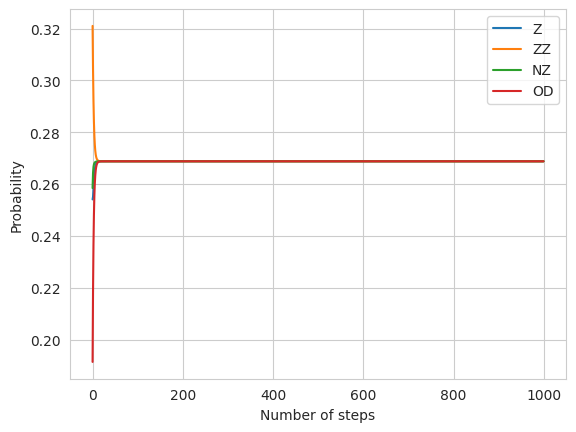

In [103]:
time_evolution(transitional_prob_matrix=P, start_state_matrix=st_P, number_of_steps=1000)